# データ解析基礎講座三日目　テーマ：時系列データの扱い方

## 自己相関係数（コレログラム）

自己相関係数は、現在の時点の値と、ある一定期間離れた時点の値の直線的関連の強さを表します。
まず、米国の公的なサイトのアクセスデータを読み込みます。データの出典は、 https://www.kaggle.com/cityofLA/los-angeles-open-data-website-traffic です。

In [1]:
import pandas as pd
df01 = pd.read_excel('データ解析講座三日目演習.xlsx',sheet_name='website_traffic',index_col=0,parse_dates=True)
df01.head()

,Socrata Users,Socrata Sessions,Socrata Bounce Rate,Geohub Users,Geohub Sessions,Geohub Bounce Rate,Combined Users
Date,,,,,,,
2017-01-01,84,93,0.0000,25,26,50.0000,109
2017-01-02,135,153,1.9608,41,49,36.7347,176
2017-01-03,301,345,0.5797,100,116,47.4138,401
2017-01-04,327,374,2.1390,111,126,51.5873,438
2017-01-05,337,372,14.2473,133,160,52.5000,470


次に、列Socrata Sessionsについて、折れ線グラフを描きます。このデータではインデックスがタイムスタンプになっているので、plot()メソッドではy軸変数のみ指定します。

Text(0.5, 1.0, 'Socrata Sessions')

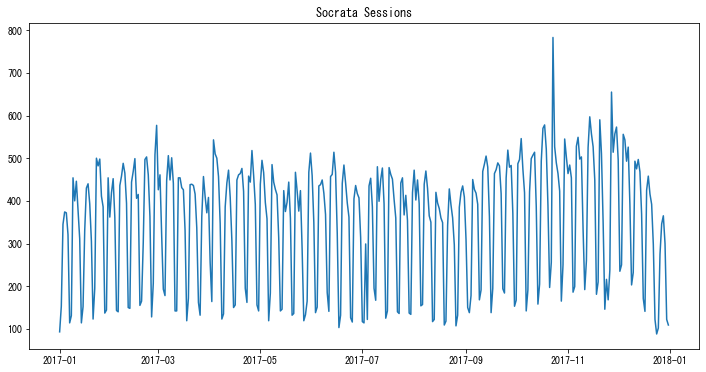

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family']='MS Gothic'
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax.plot(df01['Socrata Sessions'])
ax.set_title('Socrata Sessions')

次に、列Socrata Sessionsについて、自己相関係数を時間差毎に並べた「コレログラム」を描画します。statsmodelsライブラリを用います。

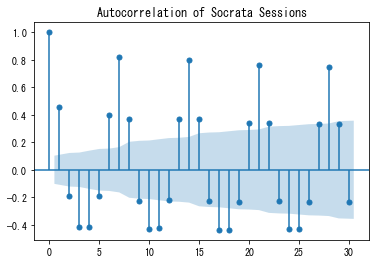

In [3]:
import statsmodels.graphics.api as smg
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df01['Socrata Sessions'],lags=30);
plt.title('Autocorrelation of Socrata Sessions')
plt.savefig('autocorr.png')

上のグラフの最も左側の点が時点差0で、順に時点差1,2,...と続きます。日単位データで時点差7,14,21,...の自己相関係数が高いので、一週間の周期変動が大きいことがわかります。

## 移動平均法

移動平均法は、時系列データのスムージングの代表的な方法で、周期変動をならす場合などに用いられます。例として、日本の新型コロナウイルス感染者数のデータを読み込みます。データの出典は、https://bit.ly/signate_covid-19_dataset です。

In [5]:
import pandas as pd
df1 = pd.read_excel('データ解析講座三日目演習.xlsx',sheet_name='新型コロナ罹患者統計',\
                    index_col=0,parse_dates=True)
df1.head()

,日本国内累計罹患者数,日本国内新規罹患者数
日付,,
2020-01-16,1,1
2020-01-17,1,0
2020-01-18,1,0
2020-01-19,1,0
2020-01-20,1,0


Text(0.5, 1.0, '新型コロナウイルス日本国内新規罹患者数')

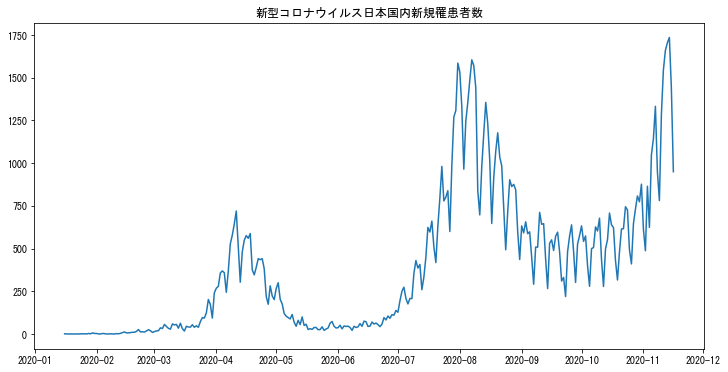

In [6]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax.plot(df1['日本国内新規罹患者数'])
ax.set_title('新型コロナウイルス日本国内新規罹患者数')

次に、7日間移動平均のグラフを重ねてみます。pandasの窓関数rolling()メソッドを使います。

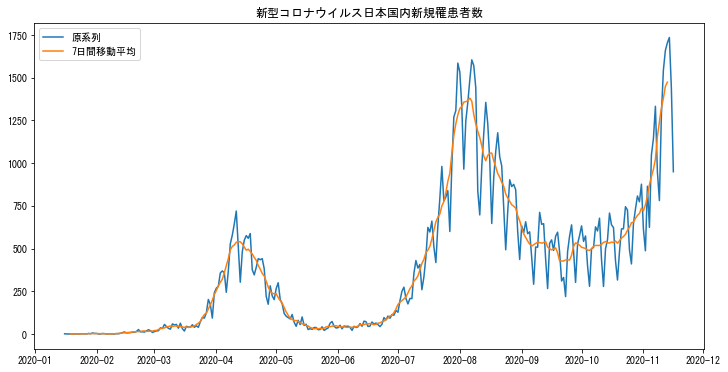

In [7]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax.plot(df1['日本国内新規罹患者数'],label='原系列')
ax.plot(df1['日本国内新規罹患者数'].rolling(7,center=True).mean(),label='7日間移動平均')
ax.set_title('新型コロナウイルス日本国内新規罹患者数')
plt.legend()
fig.savefig('covid_ma.png')

4月12日付近が感染者数のピークであったことがわかります。

## 指数平滑法

指数平滑法は時系列データのスムージングによく使われる技法です。単純移動平均と異なり、近い時点ほど指数関数的に大きな重みをつけて移動平均をとることに相当します。
例として、為替レート（ドル円）のデータを読み込みます。

In [8]:
df2 = pd.read_excel('データ解析講座三日目演習.xlsx',sheet_name='USD_JPY',index_col=0,parse_dates=True)
df2.head()

,レート
日付,
2020-01-01,108.6890
2020-01-02,108.5540
2020-01-03,108.0850
2020-01-04,108.0850
2020-01-06,108.3635


Text(0.5, 1.0, '円ドルレートの推移')

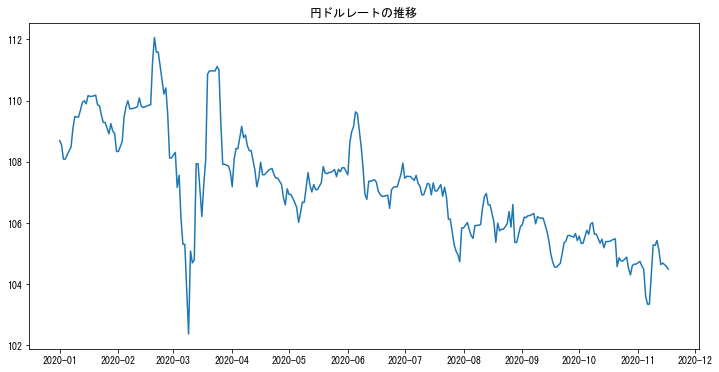

In [9]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax.plot(df2['レート'])
ax.set_title('円ドルレートの推移')

次に、指数平滑のグラフを重ねます。ここでは、指数平滑の定数αが0.3と0.7の場合についての折れ線グラフを描きます。pandasのewm()メソッドを用います。

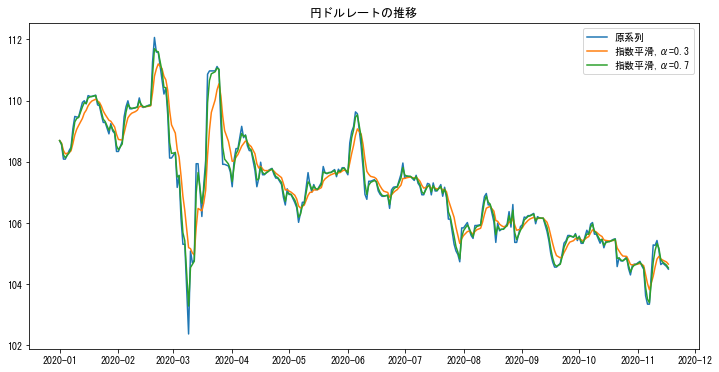

In [10]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
ax.plot(df2['レート'],label='原系列')
ax.plot(df2['レート'].ewm(alpha=0.3).mean(),label='指数平滑,α=0.3')
ax.plot(df2['レート'].ewm(alpha=0.7).mean(),label='指数平滑,α=0.7')
ax.set_title('円ドルレートの推移')
plt.legend()
fig.savefig('usd_jpy.png')

α=0.3ではかなり原系列を忠実に追っていますが、α=0.7ではより滑らかになっていることがわかります。指数平滑を直接的に予測に利用することはあまりないと思われますが、計算にあたっては1時点前の値を持っていればいいので、プログラムロジックを直接コーディングする工場の現場などでは有用です。

## （応用）時系列データの成分分解

Pythonのstatsmodelsライブラリには、時系列データをトレンド、周期変動、残差に分解するメソッドがあります。ただし、この分解がうまくいくのは、見た目でもわかるように明確な周期変動（季節変動）がある時系列データに限られるようです。ここでは最初にとりあげた米国の公的なサイトのアクセスデータの成分分解を試みます。

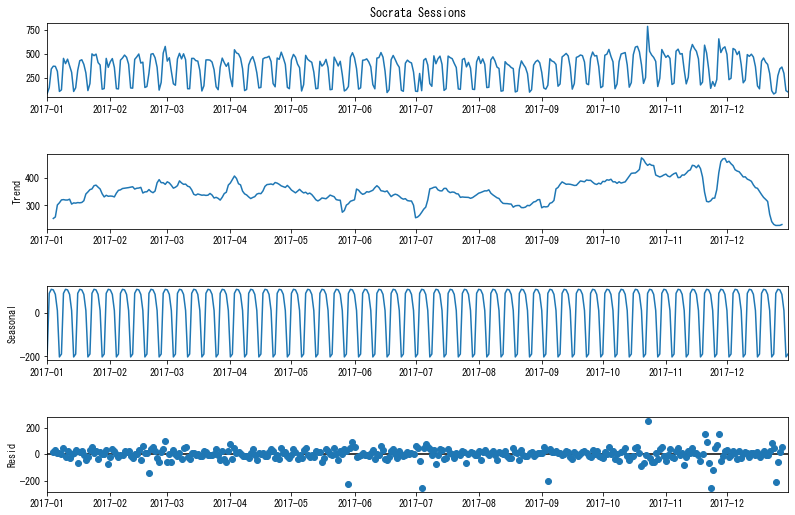

In [11]:
from statsmodels import api as sm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
decompose_result = sm.tsa.seasonal_decompose(df01['Socrata Sessions'])
fig = decompose_result.plot()
fig.set_size_inches(12,8)
fig.savefig('ts_decompose.png')

この場合は明確な週周期の変動があるため、分解はうまくいっており、トレンドや残差の成分が見やすい形で示されています。